<a href="https://colab.research.google.com/github/Mannshah2732/datascience_assignment/blob/main/SVM_and_Naive_Bayes_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theoretical

1. What is a Support Vector Machine (SVM)?

* A Support Vector Machine (SVM) is a powerful supervised machine learning algorithm primarily used for classification tasks, but it can also be adapted for regression (called Support Vector Regression).

* It tries to find the best boundary (hyperplane) that separates different classes in the data.

* The "best" boundary is the one that maximizes the margin between the classes. The margin is the distance between the hyperplane and the closest points from each class.

* These closest points that influence the boundary are called support vectors.

* Example :

  * Imagine you want to classify emails as "spam" or "not spam." SVM finds the best line or boundary that separates spam emails from non-spam emails with the largest possible margin.

2. What is the difference between Hard Margin and Soft Margin SVM?

The difference between Hard Margin and Soft Margin SVM comes down to how strictly the model enforces the separation between classes and handles misclassifications or noise.

Hard Margin SVM :

  * Definition : Finds a hyperplane that perfectly separates the classes without any misclassification.

  * Use case : Only works when data is linearly separable (no overlap between classes).

  * Constraints : No data points can be on the wrong side of the margin or hyperplane.

  * Problem : Very sensitive to outliers or noise because it demands perfect separation.

Soft Margin SVM

  * Definition : Allows some points to be within the margin or misclassified to handle noisy or overlapping data.

  * Use case : Works well when data is not perfectly linearly separable (real-world data).

  * Flexibility : Introduces slack variables (𝜉𝑖) to permit margin violations or misclassifications.

  * Trade-off : Balances maximizing margin and minimizing classification error.

| Feature           | Hard Margin SVM                   | Soft Margin SVM                                   |
| ----------------- | --------------------------------- | ------------------------------------------------- |
| Data separability | Requires perfectly separable data | Handles non-separable, noisy data                 |
| Misclassification | No misclassification allowed      | Allows some misclassification                     |
| Margin violation  | Not allowed                       | Allowed with slack variables                      |
| Robustness        | Not robust to noise or outliers   | More robust with adjustable trade-off             |
| Parameter tuning  | No regularization parameter       | Regularization parameter $C$ controls flexibility |


3. What is the mathematical intuition behind SVM?

Here’s the mathematical intuition behind Support Vector Machines (SVM) — focusing on the linear separable case first and then briefly touching on the non-linear part.

Setup :

  * Dataset : {(𝑥𝑖,𝑦𝑖)}𝑛𝑖=1 where 𝑥𝑖∈𝑅𝑑 (feature vector), and 𝑦𝑖∈{−1,+1} (class labels).

  * The hyperplane is defined by :

      w ⋅ x + b = 0
  
  * where 𝑤 is the weight vector (normal to the hyperplane) and 𝑏 is the bias.

* Decision rule :

  * Predict class +1 if :

  * 𝑤 ⋅ 𝑥 + 𝑏 ≥ 0

  * Predict class -1 otherwise.

* Margin :

  * The margin is the distance from the hyperplane to the closest points from both classes.

  * Distance from a point 𝑥 to the hyperplane is :

  * 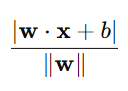

  * We want to maximize this margin.


4. What is the role of Lagrange Multipliers in SVM?

* Lagrange multipliers play a crucial role in solving the optimization problem in SVM, especially when dealing with constraints. Let me walk you through their purpose and how they fit into the SVM framework.

* The SVM optimization problem involves minimizing a function (margin) under constraints (correct classification with margin). This is a classic case of constrained optimization, which is solved using Lagrangian multipliers.

| Role                            | Description                                                                                                                                           |
| ------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1. **Enforce constraints**      | They allow incorporating inequality constraints $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ into the optimization process.                        |
| 2. **Identify support vectors** | Only data points with $\alpha_i > 0$ affect the final model. These are the **support vectors**.                                                       |
| 3. **Enable dual formulation**  | They allow converting the primal (constrained) problem into a dual (unconstrained in $\mathbf{w}, b$) problem that's easier to solve computationally. |
| 4. **Make kernels possible**    | In the dual form, the data only appears as dot products, allowing us to apply the **kernel trick** to handle non-linear boundaries.                   |


5.  What are Support Vectors in SVM?

* Support Vectors are the data points that lie closest to the separating hyperplane.

* These are the only points that directly influence (or "support") the location and margin of the hyperplane.

Why are they important?

  * The decision boundary is determined solely by these points.

  * Points far away from the margin do not affect the hyperplane.

  * They are the active constraints in the optimization problem.

Mathematically :

  * From the dual formulation of the SVM :

  * 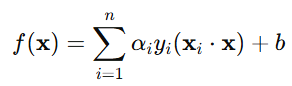

  * Only the points with 𝛼𝑖 > 0 contribute to the prediction.

  * These points are the support vectors.

6. What is a Support Vector Classifier (SVC)?

* A Support Vector Classifier (SVC) is simply the application of the SVM framework to a classification problem.

* In practice, when people talk about “SVM” for classification, they’re almost always referring to an SVC.

Key Characteristics of an SVC

  1. Decision Function
  2. Soft Margin
  3. Kernel Trick
  4. Support Vectors

When to Use SVC

  * Binary or multiclass classification tasks.

  * High-dimensional feature spaces (e.g., text classification).

  * When you want a clear geometric margin interpretation or need kernelized non-linear separation.

7. What is a Support Vector Regressor (SVR)?

* A Support Vector Regressor (SVR) is a type of machine learning model used for regression tasks, and it is based on the same principles as Support Vector Machines (SVMs), which are primarily used for classification.

Key Concepts of SVR :

  1. Objective
  2. Epsilon-insensitive loss
  3. Margin
  4. Support Vectors
  5. kernel Trick

When to Use SVR :

  * When the relationship between features and target is non-linear.

  * When you want to ignore small errors (less than ε).

  * When the dataset is not too large (SVR can be computationally intensive).

8. What is the Kernel Trick in SVM?

* The Kernel Trick is a powerful technique used in Support Vector Machines (SVMs) (including Support Vector Regressors, SVRs) to handle non-linear data without explicitly transforming the input features into higher dimensions.

How It Works :

  * Instead of computing the transformation 𝜙(𝑥) to a higher-dimensional space and then computing the dot product 𝜙(𝑥𝑖) ⋅ 𝜙(𝑥𝑗), we use a kernel function :

    * K(xi,xj) = ϕ(xi)⋅ϕ(xj)
  
  * This means we can work as if we transformed the data, but without the cost of actually doing it.

Common Kernel Functions :

| Kernel Name        | Formula                                   | Use Case                                         |
| ------------------ | ----------------------------------------- | ------------------------------------------------ |
| **Linear**         | $K(x, x') = x \cdot x'$                   | For linearly separable data                      |
| **Polynomial**     | $K(x, x') = (x \cdot x' + c)^d$           | For curved boundaries                            |
| **RBF (Gaussian)** | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$   | Very flexible, good for most non-linear problems |
| **Sigmoid**        | $K(x, x') = \tanh(\alpha x \cdot x' + c)$ | Similar to neural networks                       |


9.  Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?

Here’s a clear comparison of the Linear, Polynomial, and RBF (Radial Basis Function) kernels used in Support Vector Machines (SVM/SVR) :

1. Linear Kernel

| Aspect               | Description                                                           |
| -------------------- | --------------------------------------------------------------------- |
| **Formula**          | $K(x, x') = x \cdot x'$                                               |
| **Use Case**         | Data that is **linearly separable**. Simple relationships.            |
| **Complexity**       | **Low** – very fast to compute.                                       |
| **Parameters**       | None (or very minimal tuning, like `C` only).                         |
| **Interpretability** | **High** – similar to linear regression or logistic regression.       |
| **Example**          | Email spam classification, where features linearly impact the result. |

2. Polynomial Kernel

| Aspect               | Description                                                                     |
| -------------------- | ------------------------------------------------------------------------------- |
| **Formula**          | $K(x, x') = (x \cdot x' + c)^d$                                                 |
| **Use Case**         | Data with **non-linear but structured relationships** (e.g., quadratic curves). |
| **Complexity**       | **Moderate to High**, depending on the degree `d`.                              |
| **Parameters**       | `degree` (d), `coef0` (c), `C`.                                                 |
| **Interpretability** | Moderate – less interpretable as degree increases.                              |
| **Example**          | Modeling interaction effects (e.g., XOR logic).                                 |

3. RBF (Gaussian) Kernel

| Aspect               | Description                                                                           |
| -------------------- | ------------------------------------------------------------------------------------- |
| **Formula**          | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$                                               |
| **Use Case**         | Highly **non-linear data**; best when data is not linearly or polynomially separable. |
| **Complexity**       | **High** – especially on large datasets.                                              |
| **Parameters**       | `gamma`, `C`.                                                                         |
| **Interpretability** | **Low** – behaves like a black box.                                                   |
| **Example**          | Image recognition, handwriting detection, and other complex tasks.                    |


10. What is the effect of the C parameter in SVM?

* The C parameter in SVM (for both classification and regression) controls the trade-off between model complexity and error tolerance. It is one of the most important hyperparameters.

* C is a penalty parameter: It tells the SVM how much to punish misclassified (or, in SVR, mispredicted) points.

Effect of C in SVM (Classification)

| Value of `C` | Behavior                                                 | Model Outcome                                                                                      |
| ------------ | -------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **Small C**  | Allows more margin violations (i.e., misclassifications) | **Wider margin**, more tolerant of outliers, **simpler model**, better generalization              |
| **Large C**  | Tries to classify every point correctly (hard margin)    | **Narrower margin**, less tolerant of outliers, **more complex model**, higher risk of overfitting |


11. What is the role of the Gamma parameter in RBF Kernel SVM?

* The gamma parameter in an RBF (Radial Basis Function) kernel SVM controls how far the influence of a single training example reaches — in other words, it defines the shape and smoothness of the decision boundary.

* gamma determines how tightly the model fits the training data.

* It controls the curvature of the decision boundary created by the RBF kernel.

Effect of Different gamma Values :

| `gamma` Value                      | Behavior                                              | Model Outcome                                                                 |
| ---------------------------------- | ----------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Low `gamma`** (e.g., 0.01)       | Points far away from each other still have influence. | **Smoother, simpler decision boundary**, better generalization, may underfit. |
| **High `gamma`** (e.g., 10 or 100) | Points must be very close to influence each other.    | **Very flexible decision boundary**, tight around data points, may overfit.   |

Mathematical Role in RBF Kernel :

  * The RBF kernel is :

      K(x,x′) = exp(−γ∥x−x′∥2)
    
  * If gamma is large, ∥𝑥−𝑥′∥2 gets amplified ⇒ kernel value drops quickly ⇒ each point influences a very small area.

  * If gamma is small, kernel value drops slowly ⇒ each point influences a larger area.


12. What is the Naïve Bayes classifier, and why is it called "Naïve"?

* The Naïve Bayes classifier is a probabilistic machine learning algorithm based on Bayes' Theorem. It’s primarily used for classification tasks, especially in text classification (like spam detection, sentiment analysis, etc.).

* Naïve Bayes computes the probability of each class given a set of input features, and predicts the class with the highest probability.

*  Using Bayes’ Theorem :

  * 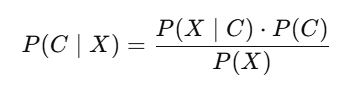

  Where:

  * 𝑃(𝐶 ∣ 𝑋) is the posterior probability of class 𝐶 given input 𝑋

  * 𝑃(𝑋∣𝐶) is the likelihood of the features given the class

  * 𝑃(𝐶) is the prior probability of the class

  * 𝑃(𝑋) is the evidence, which is constant across classes

Why Is It Called “Naïve”?

  * It’s called naïve because it assumes all features are independent given the class — which is rarely true in real-world data.

  * For example, in spam detection :

    * The words “free” and “money” are not truly independent.

    * But Naïve Bayes treats them as if they are, which simplifies computation.

  * Despite this strong (and often false) independence assumption, it works surprisingly well in many practical applications.



13. What is Bayes’ Theorem?

* Bayes’ Theorem is a fundamental concept in probability theory and statistics, used to update the probability of a hypothesis based on new evidence.

* The Formula :

  * 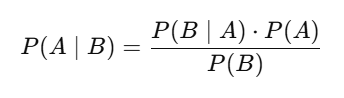

  Where :

  * 𝑃(𝐴 ∣ 𝐵) : Posterior probability — the probability of event A given that B is true.

  * 𝑃(𝐵 ∣ 𝐴) : Likelihood — the probability of observing B given that A is true.

  * 𝑃(𝐴) : Prior probability — the initial probability of A, before seeing B.

  * 𝑃(𝐵) : Evidence — the total probability of observing B under all possible conditions.

* Example (Medical Test) :

Let’s say :

  * You test positive for a disease.

  * The disease affects 1 in 1,000 people.

  * The test is 99% accurate (true positive rate = 0.99, false positive rate = 0.01).

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

The three main types of Naïve Bayes classifiers — Gaussian, Multinomial, and Bernoulli — all use Bayes' Theorem, but they differ in how they model the distribution of features.

1. Gaussian Naïve Bayes

| Feature               | Description                                                                                                                                                        |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Used for**          | Continuous data (real numbers)                                                                                                                                     |
| **Assumption**        | Features follow a **normal (Gaussian) distribution**                                                                                                               |
| **Formula**           | Uses the probability density function of a Gaussian:  <br> $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)$ |
| **Typical use cases** | Iris dataset, medical data, sensor measurements                                                                                                                    |
2. Multinomial Naïve Bayes

| Feature               | Description                                                                                                                    |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Used for**          | **Count data** (how many times a feature appears)                                                                              |
| **Assumption**        | Features represent **discrete frequencies**, like word counts                                                                  |
| **Formula**           | Models feature likelihood as:  <br> $P(x_i \mid y) = \frac{(n_y + \alpha)}{\sum_k n_{yk} + \alpha k}$ (with Laplace smoothing) |
| **Typical use cases** | **Text classification**, spam detection, document categorization                                                               |

3. Bernoulli Naïve Bayes

| Feature               | Description                                                                                                                        |
| --------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Used for**          | **Binary/boolean features** (0 or 1 — feature present or absent)                                                                   |
| **Assumption**        | Features are **binary-valued**                                                                                                     |
| **Formula**           | Likelihood modeled using **Bernoulli distribution**:  <br> $P(x_i \mid y) = p_y^{x_i} (1 - p_y)^{1 - x_i}$                         |
| **Typical use cases** | Document classification with **binary word presence**, e.g., sentiment analysis, spam detection using presence/absence of keywords |


15. When should you use Gaussian Naïve Bayes over other variants?

* You should use Gaussian Naïve Bayes when your features are continuous (real-valued) and are approximately normally distributed within each class.


Use Gaussian Naïve Bayes when :

| Condition                                                         | Explanation                                                                          |
| ----------------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| 🔢 **Features are numeric/continuous**                            | E.g., age, income, temperature, blood pressure                                       |
| 📈 **Each feature follows a Gaussian (bell-shaped) distribution** | The model assumes feature values for each class are drawn from a normal distribution |
| 🧪 **You’re dealing with small to medium-sized datasets**         | It trains quickly and works well even when data is limited                           |
| 💬 You’re **not working with word counts or binary text data**    | Those are better handled by Multinomial or Bernoulli NB                              |

* Example Use Cases for Gaussian NB :

  * Classifying patients based on lab test results (blood pressure, cholesterol, etc.)

  * Predicting if a customer will buy a product based on numerical behavioral metrics

  * Classifying sensor data (IoT, environmental readings)

16. What are the key assumptions made by Naïve Bayes?

* The Naïve Bayes classifier is built on a few key assumptions — some of which are quite "naïve" (hence the name). These assumptions simplify the model but can still yield good results in practice.

Key Assumptions of Naïve Bayes :

  1. Feature Independence Given the Class

    *  Assumption: All features are conditionally independent of each other, given the class label.

    * This means the presence or value of one feature does not influence another, once the class is known.

    * In practice : This is rarely true — many features are correlated — but Naïve Bayes often still works well despite this.
  
  2. Feature Contribution is Multiplicative

    * Since features are assumed independent, the joint probability is computed as the product of individual feature probabilities.

    * This makes the model computationally efficient.
  
  3. Correct Distributional Form (Depending on the Variant)

| Variant                     | Distribution Assumption                                         |
| --------------------------- | --------------------------------------------------------------- |
| **Gaussian Naïve Bayes**    | Features follow a **normal (Gaussian) distribution**            |
| **Multinomial Naïve Bayes** | Features represent **discrete counts** (e.g., word frequencies) |
| **Bernoulli Naïve Bayes**   | Features are **binary** (0 or 1, e.g., word present or not)     |

  4. All Features Are Relevant

    * Naïve Bayes assumes all features contribute to the outcome.

    * If irrelevant or highly noisy features are included, they may mislead the model.

17.  What are the advantages and disadvantages of Naïve Bayes?

Here’s a clear breakdown of the advantages and disadvantages of the Naïve Bayes classifier to help you understand when and why to use it — or avoid it.

* Advantages of Naïve Bayes :

| Advantage                                    | Description                                                                                            |
| -------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **1. Simple and Fast**                       | Very easy to implement and extremely fast to train and predict, even on large datasets.                |
| **2. Works well with high-dimensional data** | Especially effective in **text classification** problems like spam detection, sentiment analysis, etc. |
| **3. Requires less training data**           | Due to its probabilistic nature, it can perform well even with relatively small amounts of data.       |
| **4. Robust to irrelevant features**         | Even if some features are irrelevant, it can still produce good results.                               |
| **5. Handles missing data well**             | Can handle missing values by simply ignoring them in the probability calculation.                      |
| **6. Interpretable**                         | You can easily inspect probabilities and understand the decision process.                              |

Disadvantages of Naïve Bayes :

| Disadvantage                                                         | Description                                                                                                                                 |
| -------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Strong independence assumption**                                | Assumes that features are conditionally independent — rarely true in real data, especially when features are correlated.                    |
| **2. Poor probability estimates**                                    | While classification may be accurate, the predicted **probabilities are often unreliable**.                                                 |
| **3. Struggles with rare feature combinations**                      | If a class/feature combination is **not seen in training**, it assigns **zero probability** (can be mitigated using **Laplace smoothing**). |
| **4. Not ideal for continuous features unless normally distributed** | Gaussian Naïve Bayes assumes normal distribution, which may not always be valid.                                                            |
| **5. Limited to linear decision boundaries**                         | Unlike SVMs or decision trees, it **cannot model complex decision surfaces**.                                                               |


18.  Why is Naïve Bayes a good choice for text classification?

* Naïve Bayes is a great choice for text classification because its structure and assumptions naturally fit the way text data is represented and behaves.

Why Naïve Bayes Works Well for Text Classification :

1. Handles High-Dimensional Data Efficiently

  * Text data has thousands of possible features (words).

  * Naïve Bayes works well with sparse, high-dimensional data.

  * Its performance doesn’t degrade as dimensionality increases — unlike many other algorithms.

2. Assumes Feature Independence (Word Independence)

  * Naïve Bayes assumes that words are conditionally independent given the class.

  * While not always true (e.g., "credit" and "card" often go together), this assumption simplifies computation and still yields strong performance in practice.

3. Models Word Frequencies Naturally

  * Multinomial Naïve Bayes is specifically designed to work with word counts or term frequencies.

  * It captures how often words appear in documents — a key signal in spam detection, sentiment analysis, and topic classification.

4. Fast Training and Prediction

  * Naïve Bayes is extremely fast to train and efficient to predict — ideal for real-time applications (e.g., spam filtering).

  * It scales well to large datasets and corpora.

5. Effective with Small Training Data

  * Performs surprisingly well even when the dataset is limited.

  * This is valuable in niche domains or low-resource languages.

19. Compare SVM and Naïve Bayes for classification tasks.

Here's a detailed comparison of Support Vector Machines (SVM) and Naïve Bayes (NB) for classification tasks, including when to choose one over the other :

* Conceptual Differences

| Aspect                 | **Support Vector Machine (SVM)**                  | **Naïve Bayes (NB)**                                        |
| ---------------------- | ------------------------------------------------- | ----------------------------------------------------------- |
| **Model Type**         | Discriminative: learns decision boundary directly | Generative: models how the data is generated for each class |
| **Decision Function**  | Maximizes the margin between classes              | Uses Bayes’ Theorem to compute class probabilities          |
| **Mathematical Basis** | Optimization (max-margin classifier)              | Probability theory (Bayes’ rule + independence)             |

* Practical Differences

| Feature                  | **SVM**                                                | **Naïve Bayes**                                                |
| ------------------------ | ------------------------------------------------------ | -------------------------------------------------------------- |
| **Speed (Training)**     | Slower (especially on large datasets)                  | Extremely fast                                                 |
| **Speed (Prediction)**   | Moderate                                               | Very fast                                                      |
| **Scalability**          | Less scalable for large datasets without optimizations | Highly scalable                                                |
| **Performance**          | Usually better with non-linear boundaries              | Works well when feature independence assumption holds          |
| **Handling of Features** | Sensitive to feature scaling & outliers                | Robust to irrelevant features & outliers                       |
| **Feature Type**         | Requires numeric features (may need preprocessing)     | Works well with text/count/binary data (Multinomial/Bernoulli) |
| **Interpretability**     | Harder to interpret                                    | Easy to interpret (especially with probabilities)              |


20. How does Laplace Smoothing help in Naïve Bayes?

* Laplace Smoothing (also known as add-one smoothing) helps Naïve Bayes by solving a critical problem : Zero probability for unseen features.

The Problem: Zero Probabilities

In Naïve Bayes, we compute :

  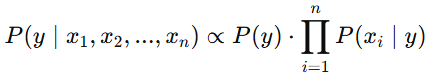

If a particular feature 𝑥𝑖 never appeared in the training data for a given class 𝑦, then :

      𝑃(𝑥𝑖 ∣ 𝑦) = 0

This causes the entire product to become zero, making the classifier unable to predict that class — even if other features strongly support it.

Effect of Laplace Smoothing :

| Without Smoothing                 | With Laplace Smoothing                         |
| --------------------------------- | ---------------------------------------------- |
| Unseen feature → probability = 0  | Unseen feature → small non-zero probability    |
| Entire class gets probability = 0 | Class still considered with reduced likelihood |
| Overconfident model               | More robust and generalizable model            |


# Practical

In [1]:
# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data       # Features
y = iris.target     # Labels

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on test set
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier on Iris test set: {accuracy:.2f}")

Accuracy of SVM classifier on Iris test set: 1.00


In [2]:
# 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then  compare their accuracies.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifiers
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train classifiers
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict on test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate accuracies
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy with Linear Kernel: {acc_linear:.2f}")
print(f"Accuracy with RBF Kernel: {acc_rbf:.2f}")

Accuracy with Linear Kernel: 1.00
Accuracy with RBF Kernel: 0.81


In [3]:
# 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean  Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better SVR performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR model with RBF kernel
svr_model = SVR(kernel='rbf')

# Train the SVR
svr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = svr_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of SVR on California Housing test set: {mse:.4f}")

Mean Squared Error (MSE) of SVR on California Housing test set: 0.3570


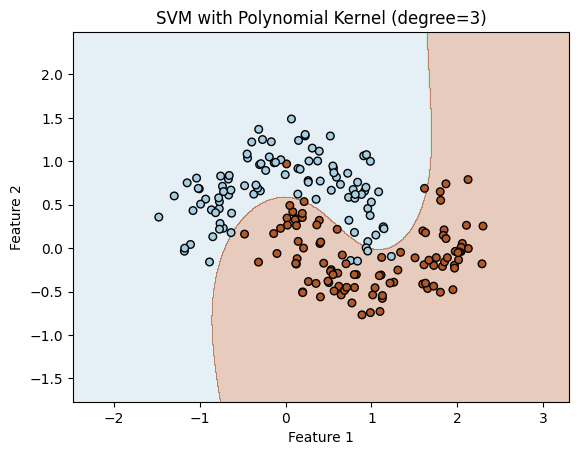

In [4]:
# 24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a simple 2D dataset (for easy visualization)
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Train SVM classifier with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, coef0=1, C=1)
svm_poly.fit(X, y)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict class for each point in the mesh
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# 25.  Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and  evaluate accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes classifier: {accuracy:.2f}")

Accuracy of Gaussian Naive Bayes classifier: 0.97


In [6]:
# 26.  Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load 20 Newsgroups dataset (subset of categories for speed, optional)
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers','footers','quotes'))

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target,
                                                    test_size=0.2, random_state=42)

# Build a pipeline: vectorizer (CountVectorizer) + TF-IDF + Multinomial Naive Bayes
text_clf = Pipeline([
    ('vect', CountVectorizer()),           # Convert text to word counts
    ('tfidf', TfidfTransformer()),         # Convert counts to TF-IDF scores
    ('clf', MultinomialNB()),              # Multinomial Naive Bayes classifier
])

# Train the classifier
text_clf.fit(X_train, y_train)

# Predict on test data
y_pred = text_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Naive Bayes on 20 Newsgroups subset: {accuracy:.2f}")

Accuracy of Multinomial Naive Bayes on 20 Newsgroups subset: 0.69


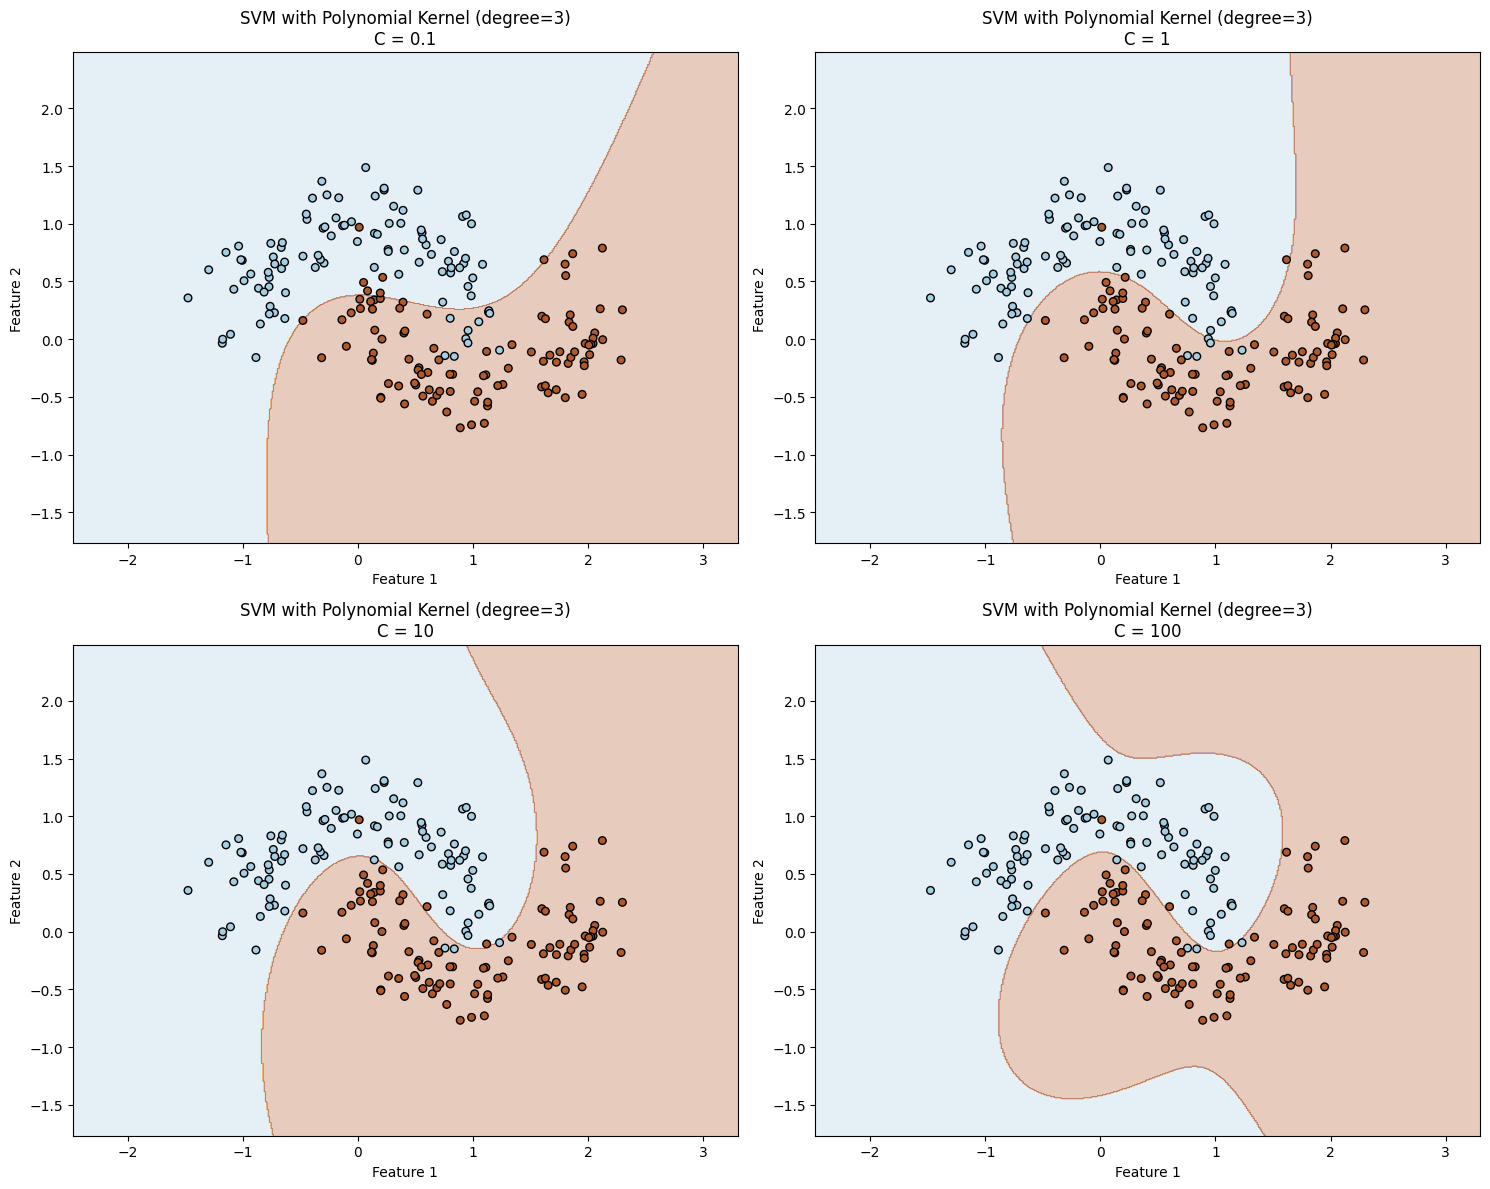

In [7]:
# 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a simple 2D dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Define different C values to compare
C_values = [0.1, 1, 10, 100]

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

plt.figure(figsize=(15, 12))

for i, C in enumerate(C_values, 1):
    # Train SVM with polynomial kernel (degree=3) and specified C
    svm = SVC(kernel='poly', degree=3, C=C, coef0=1)
    svm.fit(X, y)

    # Predict on the grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(f"SVM with Polynomial Kernel (degree=3)\nC = {C}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [8]:
# 28.  Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with  binary features.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Generate a synthetic binary classification dataset with binary features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=0, n_clusters_per_class=2,
                           random_state=42, flip_y=0.03)

# Binarize features (convert to 0/1) - threshold at 0
X_binary = (X > 0).astype(int)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Initialize Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the classifier
bnb.fit(X_train, y_train)

# Predict on test set
y_pred = bnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bernoulli Naive Bayes classifier: {accuracy:.2f}")

Accuracy of Bernoulli Naive Bayes classifier: 0.78


In [9]:
# 29.  Write a Python program to apply feature scaling before training an SVM model and compare results with  unscaled data.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Without Scaling -----
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# ----- With Scaling -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_unscaled:.2f}")
print(f"Accuracy with scaling: {acc_scaled:.2f}")

Accuracy without scaling: 1.00
Accuracy with scaling: 1.00


In [10]:
# 30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load subset of 20 Newsgroups dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers','footers','quotes'))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target,
                                                    test_size=0.2, random_state=42)

# Pipeline for MultinomialNB without smoothing (alpha=0 is not valid, so use a very small alpha)
pipeline_no_smooth = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1e-10)),  # Approaching no smoothing
])

# Pipeline for MultinomialNB with Laplace smoothing (alpha=1)
pipeline_laplace = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1)),  # Laplace smoothing
])

# Train and evaluate no smoothing
pipeline_no_smooth.fit(X_train, y_train)
y_pred_no_smooth = pipeline_no_smooth.predict(X_test)
acc_no_smooth = accuracy_score(y_test, y_pred_no_smooth)

# Train and evaluate with Laplace smoothing
pipeline_laplace.fit(X_train, y_train)
y_pred_laplace = pipeline_laplace.predict(X_test)
acc_laplace = accuracy_score(y_test, y_pred_laplace)

print(f"Accuracy without smoothing (alpha~0): {acc_no_smooth:.3f}")
print(f"Accuracy with Laplace smoothing (alpha=1): {acc_laplace:.3f}")

Accuracy without smoothing (alpha~0): 0.864
Accuracy with Laplace smoothing (alpha=1): 0.693


In [11]:
# 31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM model
svm = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Predict on test set using best estimator
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best parameters: {accuracy:.2f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Test set accuracy with best parameters: 1.00


In [12]:
# 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and  check it improve accuracy.

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM without class weighting
svm_no_weight = SVC(kernel='rbf', random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)

print("Without class weighting:")
print(f"Accuracy: {acc_no_weight:.2f}")
print(classification_report(y_test, y_pred_no_weight))

# Train SVM with class weighting balanced
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print("With class weighting:")
print(f"Accuracy: {acc_weighted:.2f}")
print(classification_report(y_test, y_pred_weighted))

Without class weighting:
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       185
           1       0.67      0.53      0.59        15

    accuracy                           0.94       200
   macro avg       0.81      0.76      0.78       200
weighted avg       0.94      0.94      0.94       200

With class weighting:
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       185
           1       0.45      0.60      0.51        15

    accuracy                           0.92       200
   macro avg       0.71      0.77      0.73       200
weighted avg       0.93      0.92      0.92       200



In [13]:
# 33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Download the SMS Spam Collection dataset (if you haven't downloaded it)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Map labels to binary (ham=0, spam=1)
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'],
                                                    test_size=0.2, random_state=42)

# Build a pipeline: vectorizer + tfidf transformer + Multinomial Naive Bayes
pipeline = Pipeline([
    ('vect', CountVectorizer()),           # Convert text to token counts
    ('tfidf', TfidfTransformer()),         # Convert counts to TF-IDF scores
    ('clf', MultinomialNB()),              # Train Multinomial Naive Bayes
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Accuracy: 0.967

Classification Report:
               precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [14]:
# 34.  Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Train Gaussian Naive Bayes classifier
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_gnb = gnb_clf.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

print(f"SVM Accuracy: {acc_svm:.2f}")
print(f"Gaussian Naive Bayes Accuracy: {acc_gnb:.2f}")

SVM Accuracy: 1.00
Gaussian Naive Bayes Accuracy: 1.00


In [15]:
# 35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Without feature selection ---
gnb_full = GaussianNB()
gnb_full.fit(X_train, y_train)
y_pred_full = gnb_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# --- With feature selection ---
# Select top 2 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
y_pred_selected = gnb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy without feature selection: {acc_full:.2f}")
print(f"Accuracy with top 2 features selected: {acc_selected:.2f}")

Accuracy without feature selection: 1.00
Accuracy with top 2 features selected: 1.00


In [16]:
# 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-vs-Rest strategy
ovr_clf = OneVsRestClassifier(SVC(kernel='rbf', random_state=42))
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# One-vs-One strategy
ovo_clf = OneVsOneClassifier(SVC(kernel='rbf', random_state=42))
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"Accuracy with One-vs-Rest (OvR): {acc_ovr:.2f}")
print(f"Accuracy with One-vs-One (OvO): {acc_ovo:.2f}")

Accuracy with One-vs-Rest (OvR): 0.78
Accuracy with One-vs-One (OvO): 0.83


In [17]:
# 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernels to evaluate
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Create SVM classifier with given kernel
    svm_clf = SVC(kernel=kernel, random_state=42)
    svm_clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy with {kernel} kernel: {acc:.4f}")

Accuracy with linear kernel: 0.9561
Accuracy with poly kernel: 0.9474
Accuracy with rbf kernel: 0.9474


In [18]:
# 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the  average accuracy.

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define the SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)

# Define Stratified K-Fold cross-validator (e.g., 5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy for each fold
scores = cross_val_score(svm_clf, X, y, cv=skf, scoring='accuracy')

# Print accuracy for each fold and average accuracy
print("Accuracy for each fold:", scores)
print(f"Average accuracy: {np.mean(scores):.4f}")

Accuracy for each fold: [1.         0.96666667 0.93333333 1.         0.93333333]
Average accuracy: 0.9667


In [19]:
# 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different prior probabilities to test
# Each prior list length should match the number of classes (3 for Iris)
priors_list = [
    None,                           # Use default priors (based on training data)
    [0.5, 0.3, 0.2],               # Custom prior: class0=50%, class1=30%, class2=20%
    [1/3, 1/3, 1/3],               # Equal priors
    [0.7, 0.15, 0.15],             # Biased towards class 0
]

for i, priors in enumerate(priors_list, 1):
    gnb = GaussianNB(priors=priors)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Model {i} - Priors: {priors if priors else 'Default'}")
    print(f"Accuracy: {acc:.4f}\n")

Model 1 - Priors: Default
Accuracy: 1.0000

Model 2 - Priors: [0.5, 0.3, 0.2]
Accuracy: 1.0000

Model 3 - Priors: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Accuracy: 1.0000

Model 4 - Priors: [0.7, 0.15, 0.15]
Accuracy: 1.0000



In [20]:
# 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and  compare accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM without feature selection
svm_clf = SVC(kernel='linear', random_state=42)  # linear kernel required for RFE
svm_clf.fit(X_train, y_train)
y_pred_full = svm_clf.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# Perform Recursive Feature Elimination (selecting top 2 features)
rfe = RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=2)
rfe.fit(X_train, y_train)

# Transform train and test data to selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train SVM on selected features
svm_clf_rfe = SVC(kernel='linear', random_state=42)
svm_clf_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_clf_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy without feature selection: {acc_full:.4f}")
print(f"Accuracy with RFE-selected features: {acc_rfe:.4f}")

Accuracy without feature selection: 1.0000
Accuracy with RFE-selected features: 1.0000


In [21]:
# 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and  F1-Score instead of accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on test data
y_pred = svm_clf.predict(X_test)

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
# 42.  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss  (Cross-Entropy Loss).

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities on test set
y_proba = gnb.predict_proba(X_test)

# Calculate Log Loss
loss = log_loss(y_test, y_proba)

print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")

Log Loss (Cross-Entropy Loss): 0.0263


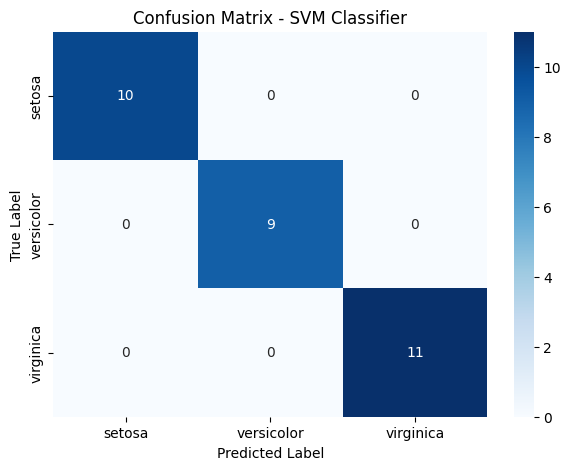

In [23]:
# 43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on test data
y_pred = svm_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

In [24]:
# 44.  Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute  Error (MAE) instead of MSE.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on test set
y_pred = svr.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.8600


In [25]:
# 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC  score.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load Breast Cancer dataset (binary classification)
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # binary labels: 0 or 1

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = gnb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9984


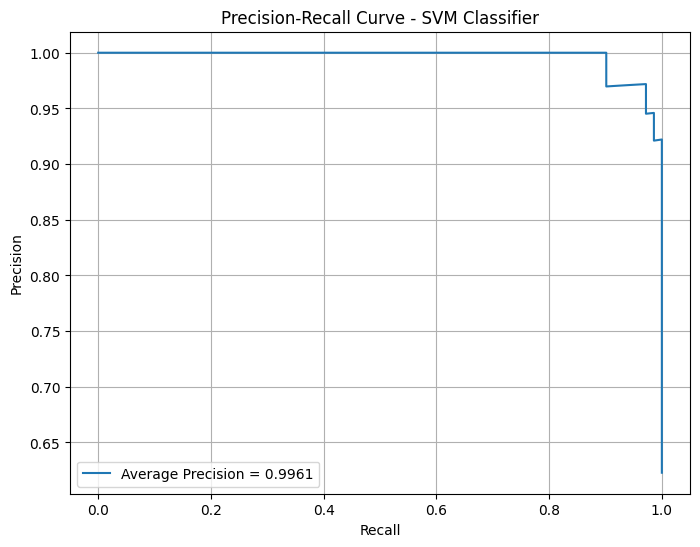

In [26]:
# 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load Breast Cancer dataset (binary classification)
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier with probability estimates enabled
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = svm_clf.predict_proba(X_test)[:, 1]

# Calculate precision, recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()